In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-and-real-news-dataset/True.csv
/kaggle/input/fake-and-real-news-dataset/Fake.csv


In [4]:
import pandas as pd
import numpy as np

fake_data=pd.read_csv("/kaggle/input/fake-and-real-news-dataset/Fake.csv")
true_data=pd.read_csv("/kaggle/input/fake-and-real-news-dataset/True.csv")
fake_data.head(10)


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [5]:
true_data.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
fake_data['class']=0
true_data['class']=1

In [7]:
fake_data.shape


(23481, 5)

In [8]:
true_data.shape

(21417, 5)

In [11]:
data_news = pd.concat([fake_data, true_data], axis =0 )
data_news.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


a graph which shows number of fake and real news that is available in the current dataset

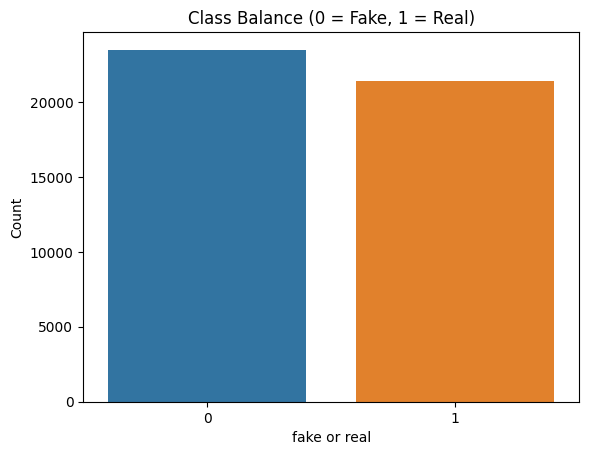

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='class', data=data_news)
plt.title("Class Balance (0 = Fake, 1 = Real)")
plt.xlabel("fake or real")
plt.ylabel("Count")
plt.show()


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


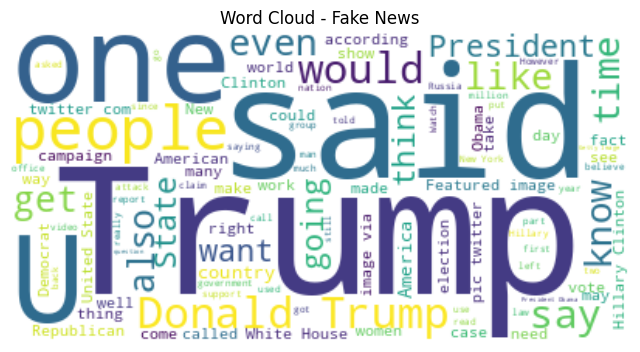

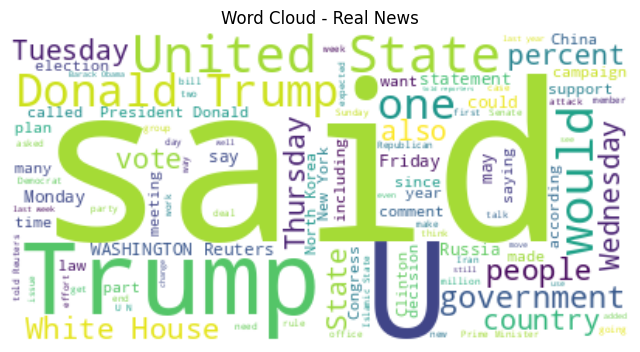

In [13]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Combine text from each category
text_fake = " ".join(data_news[data_news['class'] == 0]['text'].dropna())
text_real = " ".join(data_news[data_news['class'] == 1]['text'].dropna())

stop_words = set(stopwords.words('english'))

# Fake news word cloud
wc_fake = WordCloud(stopwords=stop_words, background_color='white', max_words=100).generate(text_fake)
plt.figure(figsize=(8,5))
plt.imshow(wc_fake, interpolation='bilinear')
plt.title("Word Cloud - Fake News")
plt.axis('off')
plt.show()

# Real news word cloud
wc_real = WordCloud(stopwords=stop_words, background_color='white', max_words=100).generate(text_real)
plt.figure(figsize=(8,5))
plt.imshow(wc_real, interpolation='bilinear')
plt.title("Word Cloud - Real News")
plt.axis('off')
plt.show()


In [16]:
data_news.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44896 entries, 0 to 21415
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44896 non-null  object
 1   text     44896 non-null  object
 2   subject  44896 non-null  object
 3   date     44896 non-null  object
 4   class    44896 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [17]:
data_news=data_news.drop(['title','subject','date'],axis=1)
data_news.head(10)

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
5,The number of cases of cops brutalizing and ki...,0
6,Donald Trump spent a good portion of his day a...,0
7,In the wake of yet another court decision that...,0
8,Many people have raised the alarm regarding th...,0
9,Just when you might have thought we d get a br...,0


In [18]:
data_news.isnull().sum()


text     0
class    0
dtype: int64

In [19]:
import pandas as pd

# Shuffle the DataFrame
data_news = data_news.sample(frac=1, random_state=42).reset_index(drop=True)
data_news.head(10)

,text,class
0,"BATON ROUGE, La. (Reuters) - U.S. President-el...",1
1,"Sebastian Gorka, deputy assistant to Donald Tr...",0
2,WASHINGTON (Reuters) - U.S. President Donald T...,1
3,A senior Donald Trump adviser is calling Hilla...,0
4,LONDON (Reuters) - Britain lifted its national...,1
5,The liberal pundits are pretty frustrated by t...,0
6,In response to the U.S. withdrawing from the P...,0
7,WELLINGTON (Reuters) - New Zealand s newly inv...,1
8,There are all kinds of pushes designed to stop...,0
9,This is great! I love how Trump destroys Savan...,0


we first have to clean the text to continue the process forward


In [20]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\w*\d\w*', '', text)
    
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    
    return ' '.join(tokens)



    



[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [21]:
data_news["text"] = data_news["text"].apply(clean)

In [22]:
x=data_news["text"]
y=data_news["class"]

In [24]:
from sklearn.model_selection import train_test_split

x_train_news, x_test_news, y_train_news, y_test_news = train_test_split(x, y, test_size=0.2)

we need to convert the text to vectors for easier calculation ml is a mathematical model which cant work on text has to work on vectors

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
x_train_news_v = vectorization.fit_transform(x_train_news)
x_test_news_v = vectorization.transform(x_test_news)

start with logistic regression to see which model suits the best will also try other models and check

In [26]:
from sklearn.linear_model import LogisticRegression

Log_reg = LogisticRegression()
Log_reg.fit(x_train_news_v,y_train_news)

LogisticRegression()

In [29]:
pred_lr=Log_reg.predict(x_test_news_v)

In [30]:
Log_reg.score(x_test_news_v, y_test_news)

0.9884187082405346

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test_news, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4715
           1       0.99      0.99      0.99      4265

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [32]:
from sklearn.tree import DecisionTreeClassifier
D=DecisionTreeClassifier()
D.fit(x_train_news_v,y_train_news)


DecisionTreeClassifier()

In [33]:
D_pred=D.predict(x_test_news_v)

In [34]:
D.score(x_test_news_v, y_test_news)

0.9965478841870824

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test_news, D_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4715
           1       1.00      1.00      1.00      4265

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [36]:
from sklearn.ensemble import GradientBoostingClassifier

GD= GradientBoostingClassifier(random_state=0)
GD.fit(x_train_news_v,y_train_news)

GradientBoostingClassifier(random_state=0)

In [38]:
GD_pred=GD.predict(x_test_news_v)

In [40]:
GD.score(x_test_news_v,y_test_news)

0.9953229398663697

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test_news, GD_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4715
           1       0.99      1.00      1.00      4265

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [42]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(random_state=0)
RF.fit(x_train_news_v, y_train_news)

RandomForestClassifier(random_state=0)

In [43]:
RF_pred=RF.predict(x_test_news_v)

In [44]:
    RF.score(x_test_news_v,y_test_news)

0.9928730512249443

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test_news, RF_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4715
           1       0.99      0.99      0.99      4265

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



test the model

In [50]:
def test_news(news_text):
    cleaned_text = clean(news_text)
    vectorized_text = vectorization.transform([cleaned_text])
    prediction_log = Log_reg.predict(vectorized_text)
    prediction_d=D.predict(vectorized_text)
    prediction_GD=GD.predict(vectorized_text)
    prediction_RF=RF.predict(vectorized_text)
    
    # Step 4: Return result
    if prediction_log[0] == 1:
        print("📰 This news appears to be **REAL**. by lr")
    else:
        print("🚨 This news appears to be **FAKE** by lr.")
    if prediction_d[0] == 1:
        print("📰 This news appears to be **REAL** by dc.")
    else:
        print("🚨 This news appears to be **FAKE**.br dc")
    if prediction_GD[0] == 1:
        print("📰 This news appears to be **REAL**.by gd")
    else:
        print("🚨 This news appears to be **FAKE** by gd.")
    if prediction_RF[0] == 1:
        print("📰 This news appears to be **REAL** by rf.")
    else:
        print("🚨 This news appears to be **FAKE**  by rf.")





In [51]:
test_news("""
The government has officially announced a new set of economic reforms aimed at revitalizing the post-pandemic economy. 
Among the key measures are corporate tax reductions and increased public infrastructure spending. Economists expect these 
changes to positively impact the GDP growth rate, potentially reaching double-digit growth by 2025.
""")


📰 This news appears to be **REAL**. by lr
🚨 This news appears to be **FAKE**.br dc
🚨 This news appears to be **FAKE** by gd.
📰 This news appears to be **REAL** by rf.


logistic regression and random forest classifier is giving correct prediction these two models are more optimum
